In [ ]:
# Mount your Google Drive in Google Colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Notebook **main.ipynb**

Il corrente notebook Google Colab utilizza le classi python definite nel notebook ***CompareSortAlgorithm.ipybn*** con l'obbiettivo di eseguire una serie di test che condurranno all'analisi dei risultati sperimentali, necessari al confronto degli algoritmi di ordinamento Insertion-Sort e Merge-Sort.

***Nota***: *segue il codice atto ad importare un notebook Google Colab all'interno di un altro notebook Google Colab. Specificare/modificare il percorso opportuno delle risorse per il corretto funzionamento del programma.*

In [ ]:
import nbformat
from IPython import get_ipython

def import_ipynb(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        nb = nbformat.read(f, as_version=4)

    # run every cells of the notebook
    ip = get_ipython()
    for cell in nb.cells:
        if cell.cell_type == 'code':
            ip.run_cell(cell.source)


notebook_CompareSortAlgorithm = '/content/drive/My Drive/Colab Notebooks/ASD/InsertionSort_VS_MergeSort/CompareSortAlgorithm.ipynb'
import_ipynb(notebook_CompareSortAlgorithm)


##Esperimenti e dati utilizzati
La comparazione tra i due algoritmi di ordinamento Insertion-Sort e Merge-Sort viene eseguita attraverso l'analisi del comportamento di questi quando vengono presi in considerazioni input di `size` progressiva e `structure` diversa. Nel dettaglio del codice che segue si prendono come riferimento cardinalità degli input pari a 50, 100, 500, 1000, 5000 elementi (interi non negativi nell'intervallo [1-10000]) con struttura randomizzata/ordinata/poco ordinata/ordinata al contrario.  
L'output che segue fornisce una panoramica circa l'esecuzione temporale dei due diversi ordinamenti.



In [ ]:
import random
import builtins

#with the following lines of code we avoid to overwrite built-in python function
#"sorted"; so doing we don't occur in "sorted is no longer callable" errror
if 'sorted' in globals() and not callable(globals()['sorted']):
    sorted = builtins.sorted

comparison = SortingComparison()
sizes = [50, 100, 500, 1000, 5000]
structures = ["random", "almost_sorted", "reversed", "sorted_list"]

results = comparison.compareAlgorithms(sizes, structures)
comparison.analyzeResults(results)


Inizializing sort algorithms class...

--- Sorting Algorithm Comparison ---

***********************************************
[Input Size: 50 - Structure: random]
Insertion Sort Time: 0.000307 seconds
Merge Sort Time: 0.000228 seconds
Faster: Merge Sort
***********************************************
[Input Size: 100 - Structure: random]
Insertion Sort Time: 0.000957 seconds
Merge Sort Time: 0.000454 seconds
Faster: Merge Sort
***********************************************
[Input Size: 500 - Structure: random]
Insertion Sort Time: 0.035008 seconds
Merge Sort Time: 0.002634 seconds
Faster: Merge Sort
***********************************************
[Input Size: 1000 - Structure: random]
Insertion Sort Time: 0.114585 seconds
Merge Sort Time: 0.005189 seconds
Faster: Merge Sort
***********************************************
[Input Size: 5000 - Structure: random]
Insertion Sort Time: 3.374197 seconds
Merge Sort Time: 0.032743 seconds
Faster: Merge Sort
*************************************

##Infografica dei risultati
L'analisi dei risultati viene effettuata anche attraverso lo studio di un'infografica realizzata dalla cella di codice python sottostante che fa uso della libreria per modelli grafici `matplotlib`. L'infografica pensata mette in relazione, attraverso dei grafici a barre, le tempistiche di ordinamento dei due algoritmi raggruppando i grafici per ogni categoria di `size` considerata.



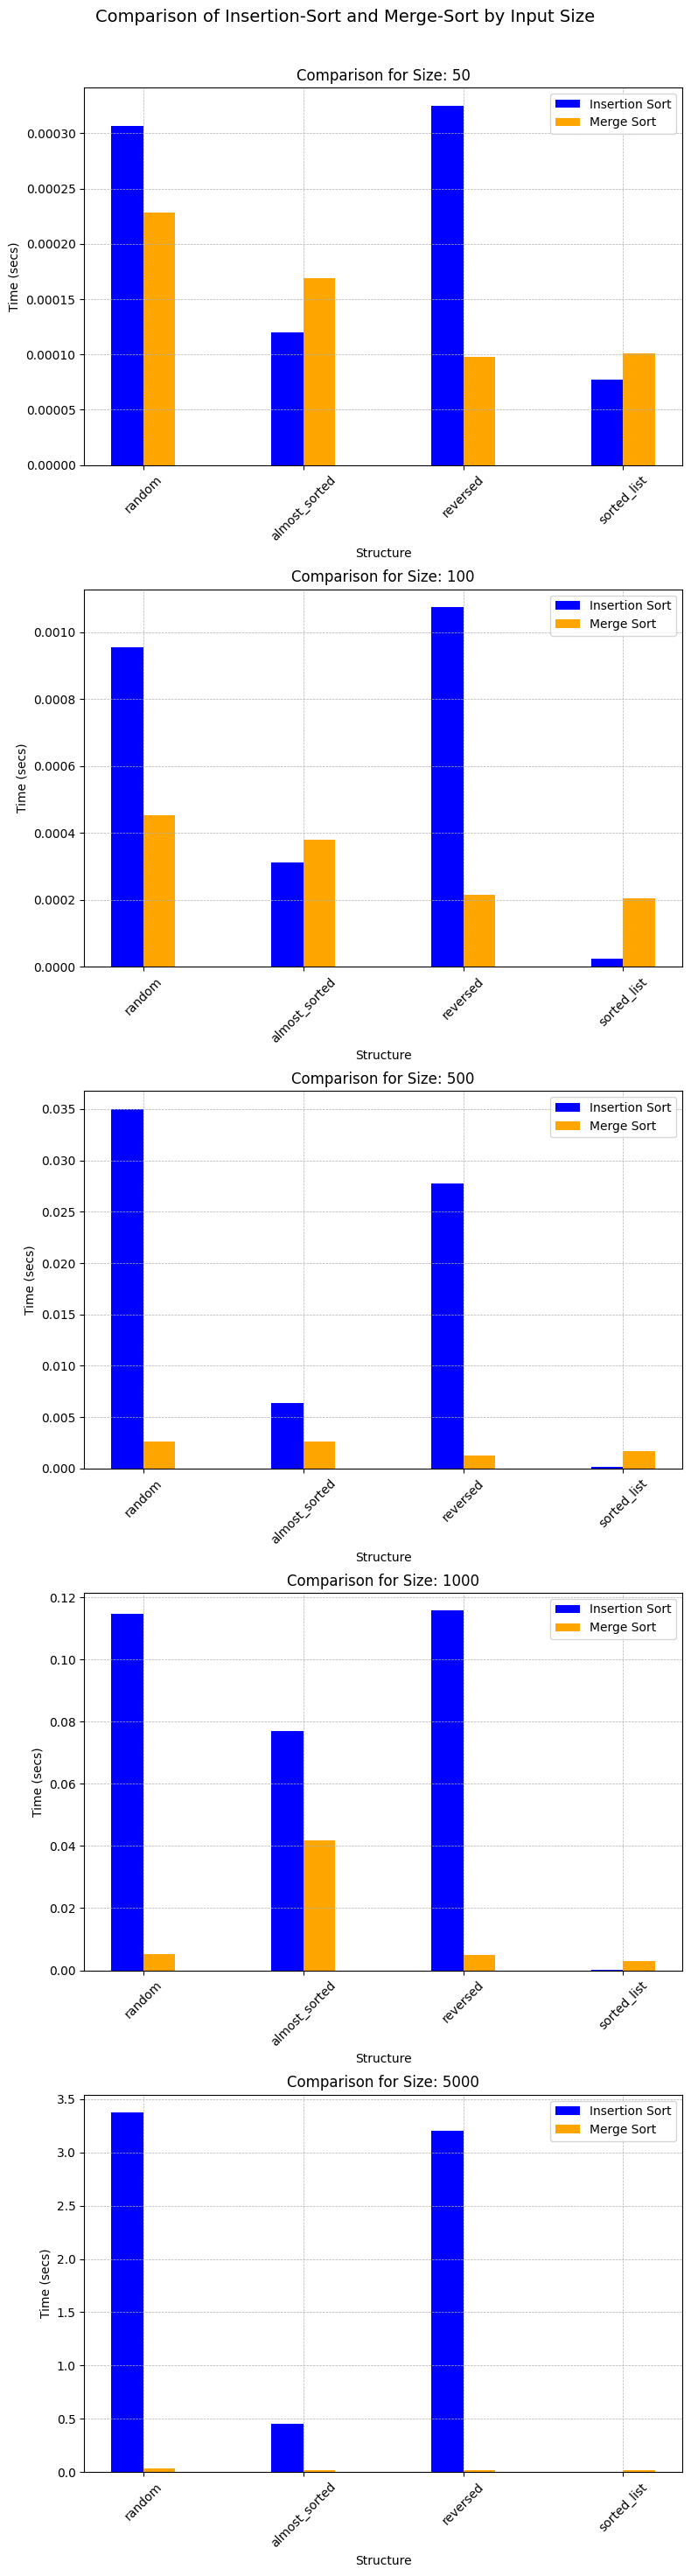

In [ ]:
import matplotlib.pyplot as plt

#extract each type of size and structure
sizes = sorted(set(item["size"] for item in results))
structures = sorted(set(item["structure"] for item in results))

#create as subplot as are size's category
fig, axes = plt.subplots(len(sizes), 1, figsize=(8, 6 * len(sizes)))

if len(sizes) == 1:
    axes = [axes] #if there is only one size, assure that "axes" is a list

for i, size in enumerate(sizes):
    ax = axes[i]

    #we have to obtain only data for the current size
    subset = [item for item in results if item["size"] == size]

    #hence we extract data from the subset created for generating infographic
    x = [item["structure"] for item in subset]
    insertion_times = [item["insertion_sort_time"] for item in subset]
    merge_times = [item["merge_sort_time"] for item in subset]

    # Creare il grafico a barre
    bar_width = 0.2
    indices = range(len(x))
    ax.bar(indices, insertion_times, bar_width, label="Insertion Sort",
           color="blue")
    ax.bar([idx + bar_width for idx in indices], merge_times, bar_width,
           label="Merge Sort", color="orange")

    #lines infographics (option two)
    #ax.plot(indices, insertion_times, label="Insertion Sort", color="blue"
                              #marker='o')
    #ax.plot(x, merge_times, label="Merge Sort", marker="o", color="orange")

    #axes configuration
    ax.set_title(f"Comparison for Size: {size}", fontsize=12)
    ax.set_xlabel("Structure")
    ax.set_ylabel("Time (secs)")
    ax.set_xticks([idx + bar_width / 2 for idx in indices])
    ax.set_xticklabels(x, rotation=45)
    ax.legend()
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# general title
fig.suptitle("Comparison of Insertion-Sort and Merge-Sort by Input Size",
             fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.95)

#show infographic
plt.show()



##Analisi dei risultati sperimentali

1.  Struttura randomizzata: si osserva che l'algoritmo Merge-Sort è sistematicamente più veloce temporalmente e guadagna un vantaggio crescente su input di dimensione maggiore.
    * per size=50 ad esempio la differenza temporale tra i due algoritmi è minima (circa 0.00008s) ma questa aumenta drasticamente per size=5000 (Merge-Sort è 100 volte più veloce);
    * si nota quindi che, in linea con la complessità teorica, Insertion-Sort peggiora rapidamente come $O(n²)$, mentre Merge-Sort come $O(n log n)$;


2.  Struttura poco ordinata
    * per input di size piccola (inferiore a 100 elementi) Insertion-Sort sfrutta una complessità $O(n)$, quindi risulta più veloce;
    * per input di size maggiore (sopra i 500 elementi) Merge-Sort diviene dominante grazie alla sua complessità $O(nlogn)$;


3.  Struttura ordinata al contrario: Merge-Sort è sempre più veloce, a discapito della size dell'input presentato.
    * Insertion-Sort soffre quindi del caso peggiore $O(n²)$ causa l'inversione totale dell'input;
    * Merge-Sort mantiene invece tempi ridotti grazie alla sua struttura ricorsiva;


4.  Struttura ordinata: Insertion-Sort supera Merg-Sort in ogni caso, confermando la complessità teorica nel suo caso migliore $O(n)$. La riduzione drastica delle tempistiche è dovuta al numero al limitatissimo numero di confronti tra elementi dell'input; proprietà di cui non gode Merge-Sort.



